In [1]:
import os
from os.path import join

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('paper.mcstyle')
import seaborn as sns
import pandas as pd

import numpy as np

In [2]:
import ili
from ili.dataloaders import StaticNumpyLoader
from ili.validation.runner import ValidationRunner

## NPE/NLE/NRE/DELFI toy comparison

In [3]:
# Load data
cfgdir = '/home/mattho/git/ltu-ili/paper/configs/toy_model/'
wdir = '/home/mattho/git/ltu-ili/paper/wdir'

os.chdir(wdir)

In [7]:
all_loader = StaticNumpyLoader.from_config(join(cfgdir, "data.yaml"))
x, theta = all_loader.get_all_data(), all_loader.get_all_parameters()

np.random.seed(12345)
ind = np.random.choice(len(x))
x_obs = x[ind]
theta_obs = theta[ind]
ndim = theta.shape[1]

samples = {}
models = ['SNPE', 'SNLE', 'SNRE']#, 'pydelfi']
for m in models:
    samples[m] = np.load(join(wdir, 'toy', f'toy_{m}_single_samples.npy'))

In [8]:
sampdf = [
    pd.DataFrame(samples[m], columns=['t0', 't1', 't2'])
    for m in models
]
for i in range(len(models)):
    sampdf[i]['model'] = models[i]
sampdf = pd.concat(sampdf)

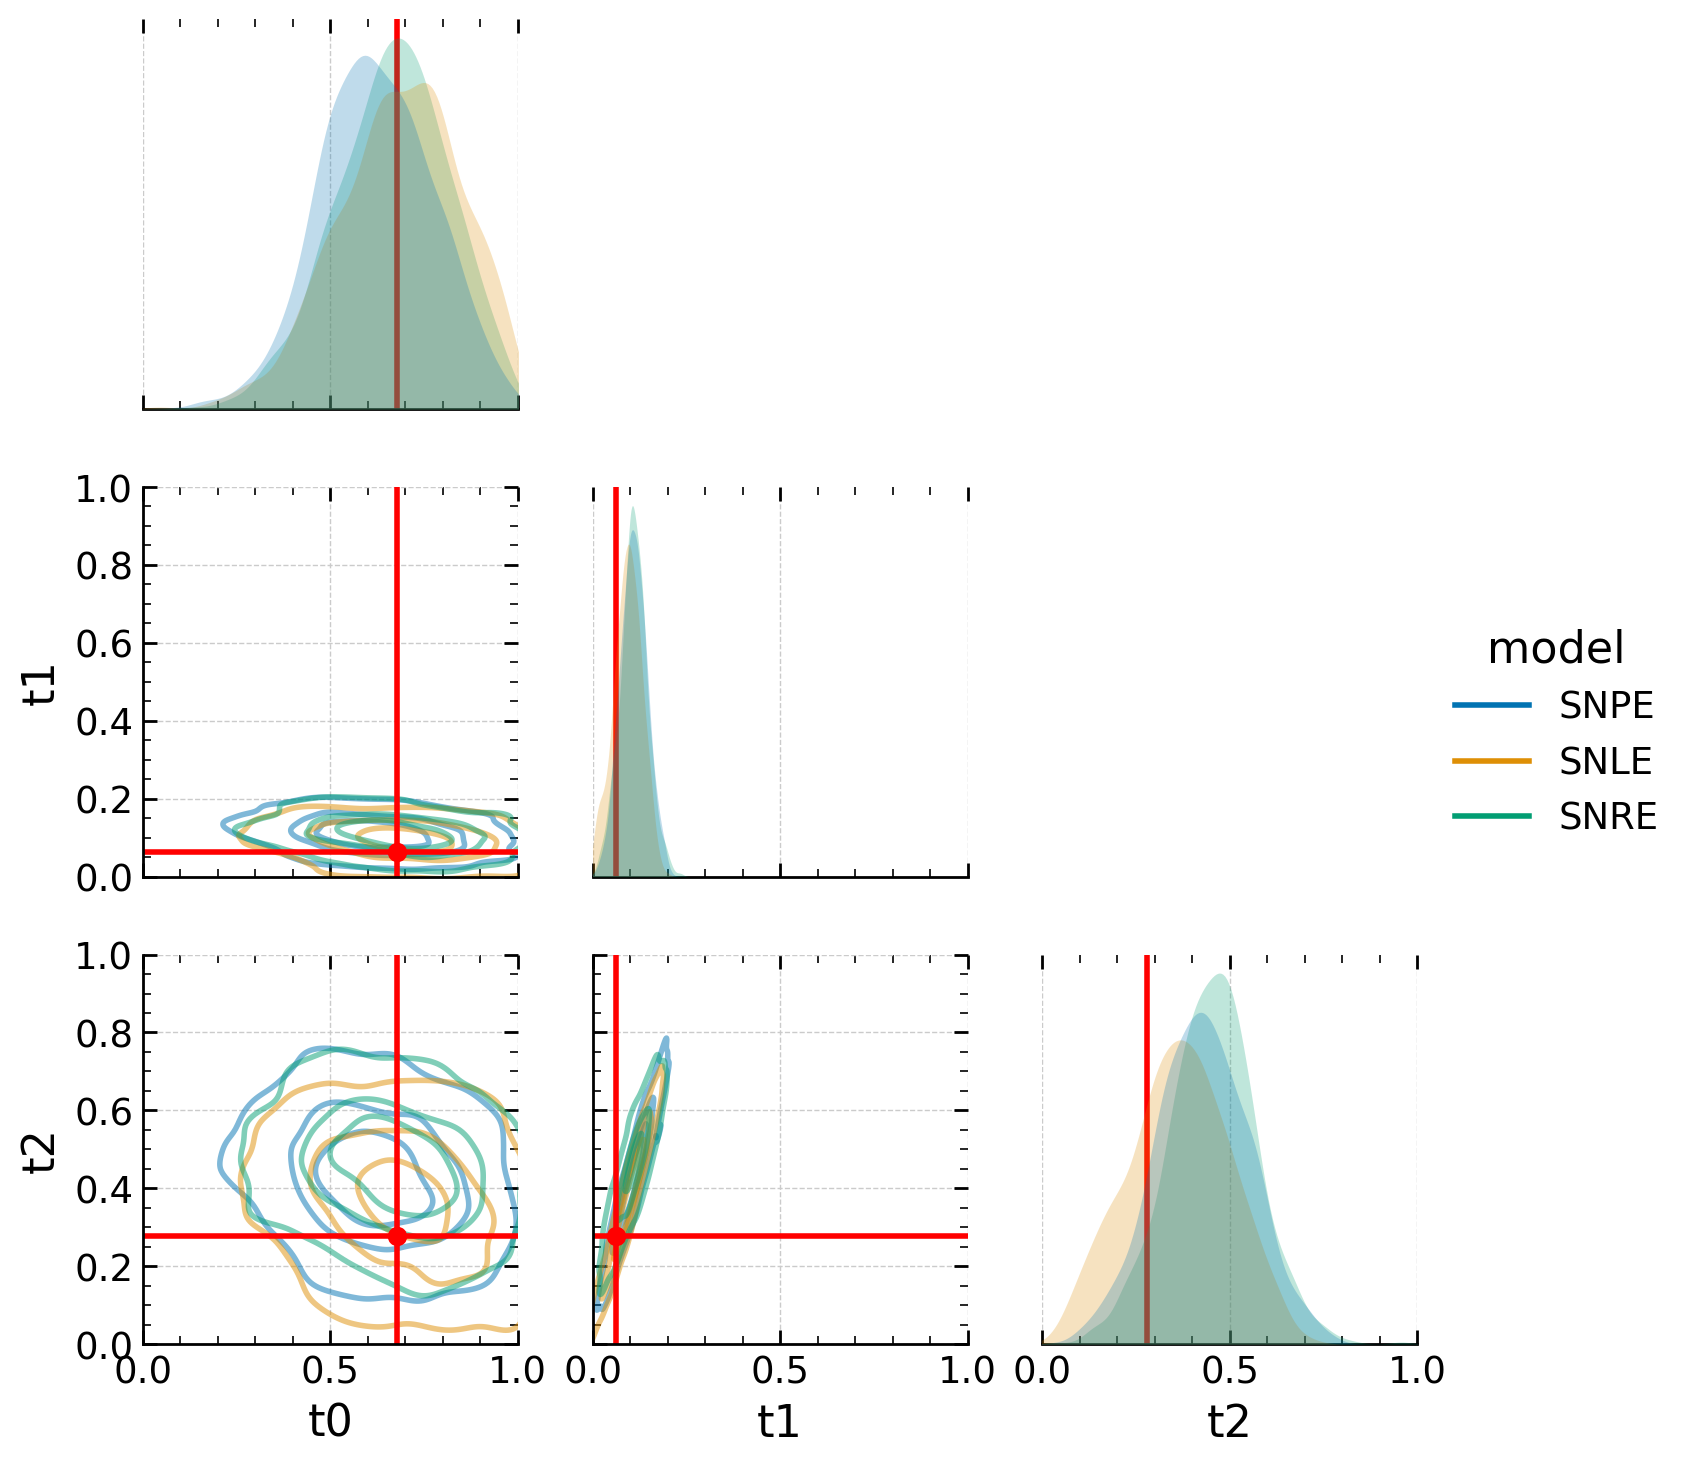

In [12]:
g = sns.pairplot(
    sampdf,
    hue='model',
    kind='kde',
    diag_kind='kde',
    plot_kws=dict(alpha=0.5, levels=4),
    diag_kws=dict(linewidth=0),
    palette='colorblind',
    corner=True,
)
# plot the true value
for i in range(ndim):
    for j in range(i + 1):
        if i == j:
            g.axes[i, i].axvline(theta_obs[i], color="r")
            g.axes[i, i].set_xlim(0, 1)
        else:
            g.axes[i, j].axhline(theta_obs[i], color="r")
            g.axes[i, j].axvline(theta_obs[j], color="r")
            g.axes[i, j].plot(theta_obs[j], theta_obs[i], "ro")
            g.axes[i, j].set_xlim(0, 1)
            g.axes[i, j].set_ylim(0, 1)
plt.subplots_adjust(hspace = 0.2, wspace = 0.2)

SNPE (1500, 3)
SNLE (1500, 3)
SNRE (1500, 3)


(0.0, 1.0)

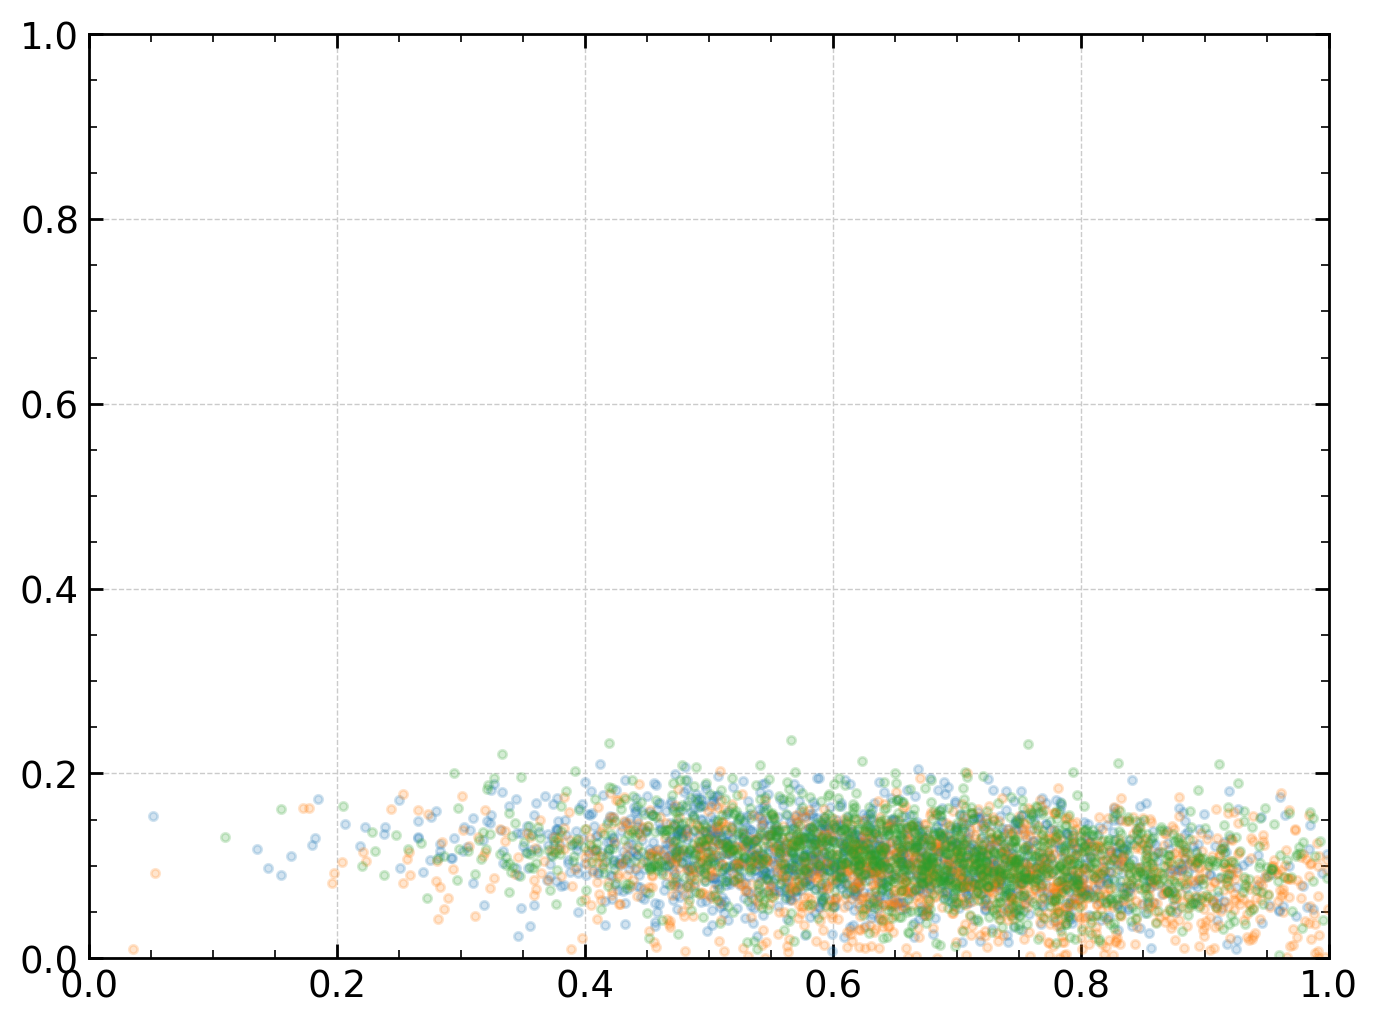

In [6]:
for m in models:
    t = samples[m]
    print(m, t.shape)
    plt.plot(t[:, 0], t[:, 1], '.', alpha=0.2)
plt.xlim(0,1)
plt.ylim(0,1)